# Analyse exploratoire des données

In [15]:
import os
import glob
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Obtenir la date actuelle au format YYYYMMDD
current_date = datetime.now().strftime("%Y%m%d")

# Spécifier le chemin du dossier "backup"
backup_dir = 'backup'

# Vérifier si le dossier "backup" existe
if not os.path.exists(backup_dir):
    print(f"Le dossier {backup_dir} n'existe pas. Veuillez le créer et y ajouter des fichiers.")
    exit()

# Rechercher tous les fichiers correspondant au format "properties_db_*.csv" dans le dossier backup
file_pattern = os.path.join(backup_dir, "properties_db_*.csv")
files = glob.glob(file_pattern)

if files:
    # Filtrer pour trouver un fichier de la date courante ou le plus récent
    current_date_pattern = os.path.join(backup_dir, f"properties_db_{current_date}.csv")
    if current_date_pattern in files:
        latest_file = current_date_pattern
        print(f"Fichier correspondant à la date courante trouvé : {latest_file}")
    else:
        # Si aucun fichier pour la date courante, sélectionner le fichier le plus récent
        latest_file = max(files, key=os.path.getmtime)
        print(f"Aucun fichier pour la date courante. Dernier fichier disponible : {latest_file}")

    # Charger le fichier CSV dans un DataFrame
    try:
        df_properties = pd.read_csv(latest_file)
        print("Fichier importé avec succès.")
        print(df_properties.info())  # Informations sur le DataFrame
    except Exception as e:
        print(f"Erreur lors de la lecture du fichier {latest_file}: {e}")
else:
    print("Aucun fichier disponible dans le dossier 'backup'.")

Aucun fichier pour la date courante. Dernier fichier disponible : backup/properties_db_20250207.csv
Fichier importé avec succès.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65652 entries, 0 to 65651
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   _id                65652 non-null  int64  
 1   add_date           65652 non-null  object 
 2   city               65652 non-null  object 
 3   description        65652 non-null  object 
 4   longitude          65652 non-null  float64
 5   latitude           65652 non-null  float64
 6   price              65652 non-null  float64
 7   type               65652 non-null  object 
 8   municipal_taxes    65652 non-null  float64
 9   school_taxes       65652 non-null  float64
 10  construction_year  65652 non-null  float64
 11  surface            65652 non-null  float64
 12  region             65444 non-null  object 
 13  vendue             65652 non-null  bo

/var/folders/xz/ddgf0yhx2878l5_5hjcr9rp00000gn/T/ipykernel_54532/1283027436.py:36: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_properties = pd.read_csv(latest_file)


## Répartition des types de propriétés

Afficher la répartition des propriétés en fonction de leur type :

type
Maison                        26758
House for sale                12489
Condo                          9638
Duplex                         6485
Triplex                        3885
Quadruplex                     1784
Duplex for sale                 874
Cottage for sale                772
Triplex for sale                545
Chalet                          469
Quintuplex                      387
Maison en copropriété           363
Quadruplex for sale             311
Condominium house for sale      185
Mobile home for sale            173
Fermette                        164
Hobby farm for sale             130
Ferme                           125
Quintuplex for sale             114
Maison mobile                     1
Name: count, dtype: int64


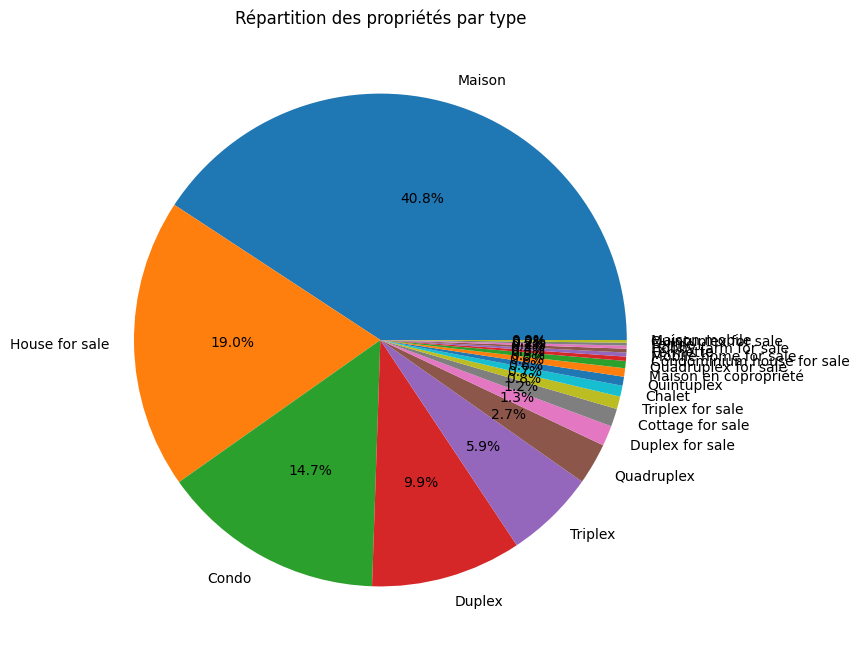

In [16]:
# Compter le nombre de propriétés par type
property_type_counts = df_properties['type'].value_counts()

# Afficher les résultats
print(property_type_counts)

# Visualiser avec un graphique en secteurs
import matplotlib.pyplot as plt

property_type_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Répartition des propriétés par type')
plt.ylabel('')
plt.show()

In [17]:
property_type_counts.index

Index(['Maison', 'House for sale', 'Condo', 'Duplex', 'Triplex', 'Quadruplex',
       'Duplex for sale', 'Cottage for sale', 'Triplex for sale', 'Chalet',
       'Quintuplex', 'Maison en copropriété', 'Quadruplex for sale',
       'Condominium house for sale', 'Mobile home for sale', 'Fermette',
       'Hobby farm for sale', 'Ferme', 'Quintuplex for sale', 'Maison mobile'],
      dtype='object', name='type')

In [18]:
# Dictionnaire de mappage pour regrouper les types de propriétés similaires
type_vers_categorie = {
    # Appartement/Condo
    "Condo": "Appartement/Condo",
    "Maison en copropriété": "Appartement/Condo",
    "Condo for sale": "Appartement/Condo",
    "Condominium house for sale": "Appartement/Condo",
    "Loft / Studio for sale": "Appartement/Condo",
    
    # Autres
    "Inconnu": "Autres",
    
    # Fermes et propriétés agricoles
    "Fermette": "Fermes et propriétés agricoles",
    "Ferme": "Fermes et propriétés agricoles",
    "Hobby farm for sale": "Fermes et propriétés agricoles",
    
    # Maison individuelle
    "Maison": "Maison individuelle",
    "Chalet": "Maison individuelle",
    "Cottage for sale": "Maison individuelle",
    "Maison mobile": "Maison individuelle",
    "Mobile home for sale": "Maison individuelle",
    
    # Multilogement
    "Duplex": "Multilogement",
    "Triplex": "Multilogement",
    "Quadruplex": "Multilogement",
    "Quintuplex": "Multilogement",
    "Duplex for sale": "Multilogement",
    "Triplex for sale": "Multilogement",
    "Quadruplex for sale": "Multilogement",
    "Quintuplex for sale": "Multilogement",
    
    # Terrain
    "Lot for sale": "Terrain",
    "Terrain": "Terrain",
    "Land for sale": "Terrain",
    "Terre": "Terrain",
}

# Fonction pour mapper les types de propriétés en catégories
# Appliquer le mappage pour regrouper les types de propriétés en catégories
df_properties['category'] = df_properties['type'].map(type_vers_categorie).fillna('Autres')

# Vérifier les résultats
print(df_properties['category'].value_counts())

category
Maison individuelle               28173
Multilogement                     14385
Autres                            12489
Appartement/Condo                 10186
Fermes et propriétés agricoles      419
Name: count, dtype: int64


### Vérifier la répartition par catégorie

Après regroupement, afficher la répartition des catégories principales :

category
Maison individuelle               28173
Multilogement                     14385
Autres                            12489
Appartement/Condo                 10186
Fermes et propriétés agricoles      419
Name: count, dtype: int64


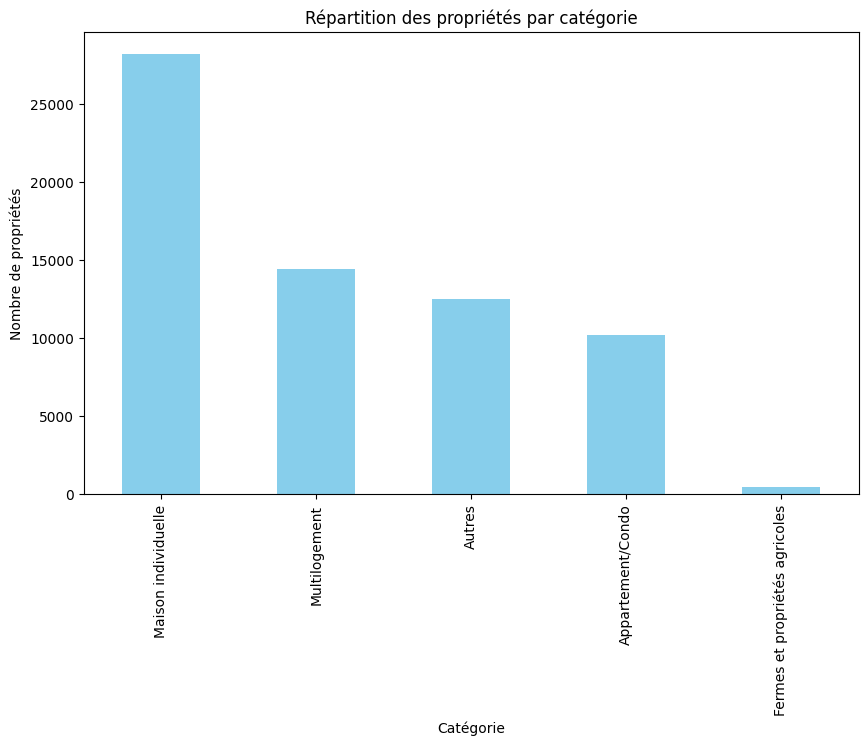

In [19]:
# Répartition par catégorie
category_counts = df_properties['category'].value_counts()

print(category_counts)

# Visualisation
category_counts.plot(kind='bar', figsize=(10, 6), title="Répartition des propriétés par catégorie", color='skyblue')
plt.ylabel("Nombre de propriétés")
plt.xlabel("Catégorie")
plt.show()

### Répartition des propriétés par région

category
Maison individuelle               28173
Multilogement                     14385
Autres                            12489
Appartement/Condo                 10186
Fermes et propriétés agricoles      419
Name: count, dtype: int64


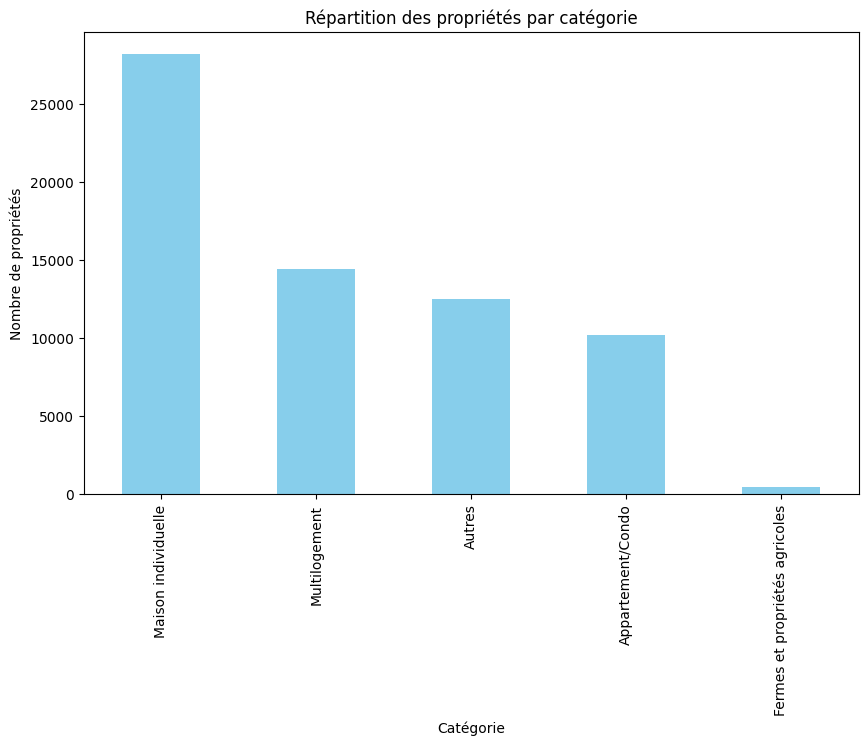

In [20]:
# Répartition par catégorie
category_counts = df_properties['category'].value_counts()

print(category_counts)

# Visualisation
category_counts.plot(kind='bar', figsize=(10, 6), title="Répartition des propriétés par catégorie", color='skyblue')
plt.ylabel("Nombre de propriétés")
plt.xlabel("Catégorie")
plt.show()

### Proportion des propriétés par région (en %)

region
Montréal (Île)          17757
Montérégie              12358
Laurentides              9241
Lanaudière               8537
Estrie                   5337
Laval                    4636
Chaudière-Appalaches     4527
Mauricie                 3051
Name: count, dtype: int64


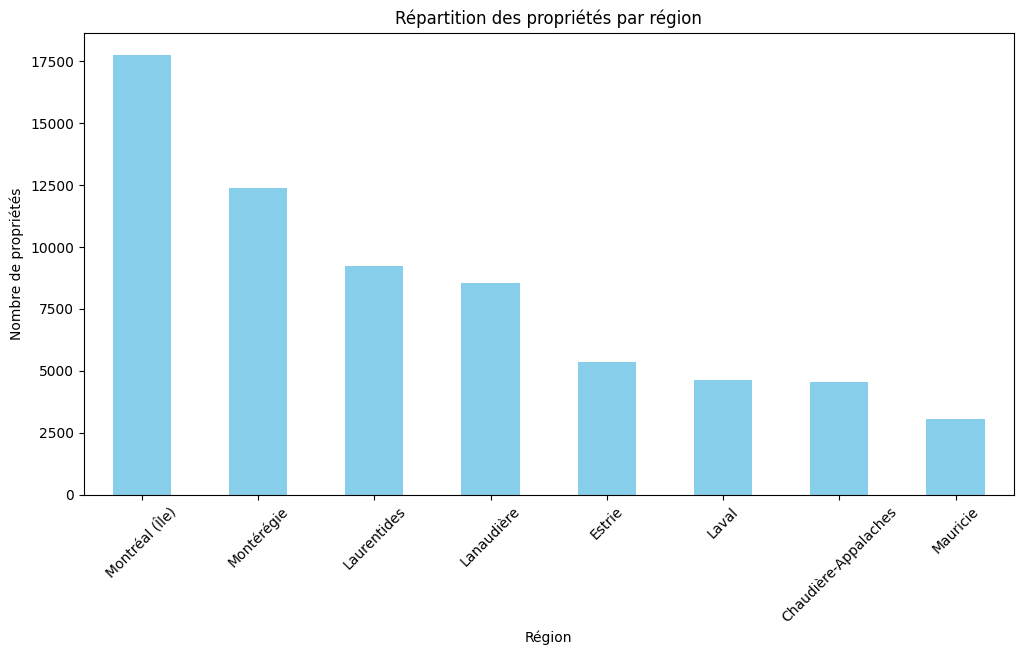

In [21]:
# Calculer le nombre de propriétés par région
region_distribution = df_properties['region'].value_counts()

# Afficher les résultats
print(region_distribution)

# Graphique en barres
region_distribution.plot(kind='bar', figsize=(12, 6), color='skyblue', title="Répartition des propriétés par région")
plt.ylabel("Nombre de propriétés")
plt.xlabel("Région")
plt.xticks(rotation=45)
plt.show()

In [22]:
# Proportion en %
region_distribution_percentage = (region_distribution / region_distribution.sum()) * 100

# Afficher les résultats
print(region_distribution_percentage)

region
Montréal (Île)          27.133121
Montérégie              18.883320
Laurentides             14.120469
Lanaudière              13.044741
Estrie                   8.155064
Laval                    7.083919
Chaudière-Appalaches     6.917364
Mauricie                 4.662001
Name: count, dtype: float64


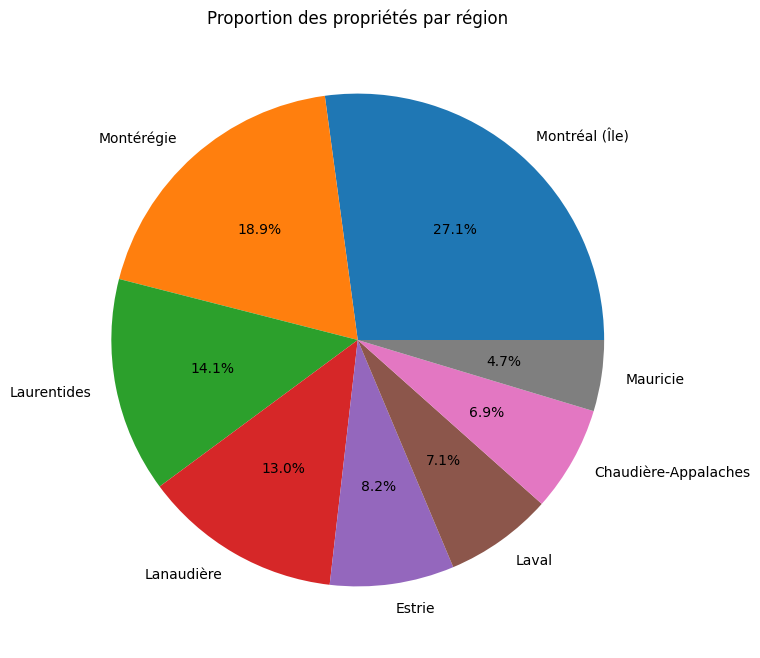

In [23]:
# Graphique en camembert
region_distribution_percentage.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', title="Proportion des propriétés par région")
plt.ylabel("")  # Supprimer l'étiquette "region"
plt.show()

### Ditribution des catégories de propriétés par region

Répartition des catégories par région exportée dans 'region_category_distribution.csv'.


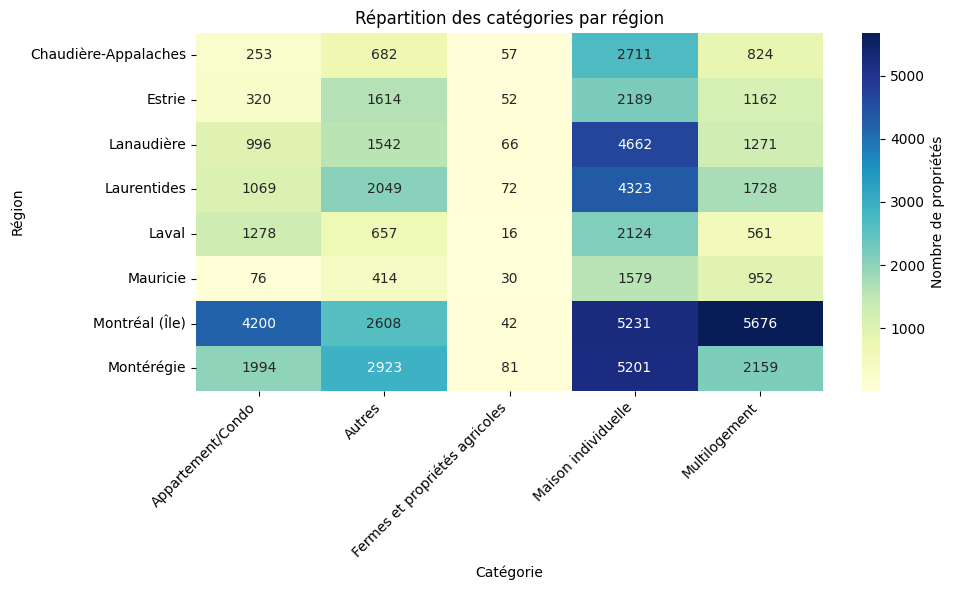

In [24]:
# Tableau croisé dynamique pour observer les catégories dans chaque région
region_category_distribution = pd.crosstab(df_properties['region'], df_properties['category'])

# Afficher les résultats
#print(region_category_distribution)

# Exporter la distribution par région
region_distribution.to_csv("region_distribution.csv", index=True)
region_category_distribution.to_csv("region_category_distribution.csv")
print("Répartition des catégories par région exportée dans 'region_category_distribution.csv'.")

# Créer une heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(region_category_distribution, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={"label": "Nombre de propriétés"})
plt.title("Répartition des catégories par région")
plt.xlabel("Catégorie")
plt.ylabel("Région")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Afficher le graphique
plt.show()

### Ditribution des catégories de propriétés sur le marché par region

Répartition des catégories par région exportée dans 'region_category_distribution.csv'.


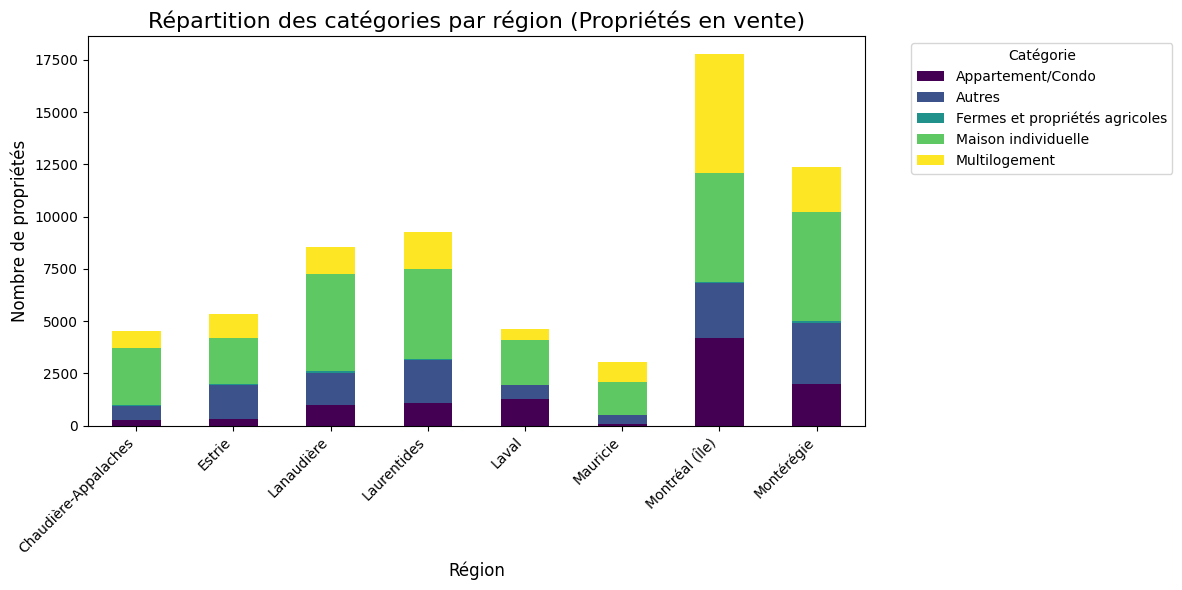

In [25]:
# Filtrer les propriétés en vente (non vendues)
properties_for_sale = df_properties[df_properties['vendue'] == False]

# Tableau croisé dynamique pour observer les catégories dans chaque région
region_category_distribution_on_sale = pd.crosstab(properties_for_sale['region'], properties_for_sale['category'])

# Afficher les résultats
#print(region_category_distribution)

region_category_distribution_on_sale.to_csv("region_category_distribution.csv")
print("Répartition des catégories par région exportée dans 'region_category_distribution.csv'.")

# Préparer les données pour le graphique en barres empilées
region_category_distribution.plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 6), 
    colormap='viridis'
)

# Ajouter des labels et un titre
plt.title("Répartition des catégories par région (Propriétés en vente)", fontsize=16)
plt.xlabel("Région", fontsize=12)
plt.ylabel("Nombre de propriétés", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Catégorie", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Afficher le graphique
plt.show()


Répartition des propriétés par région et année exportée dans 'yearly_region_distribution.csv'.


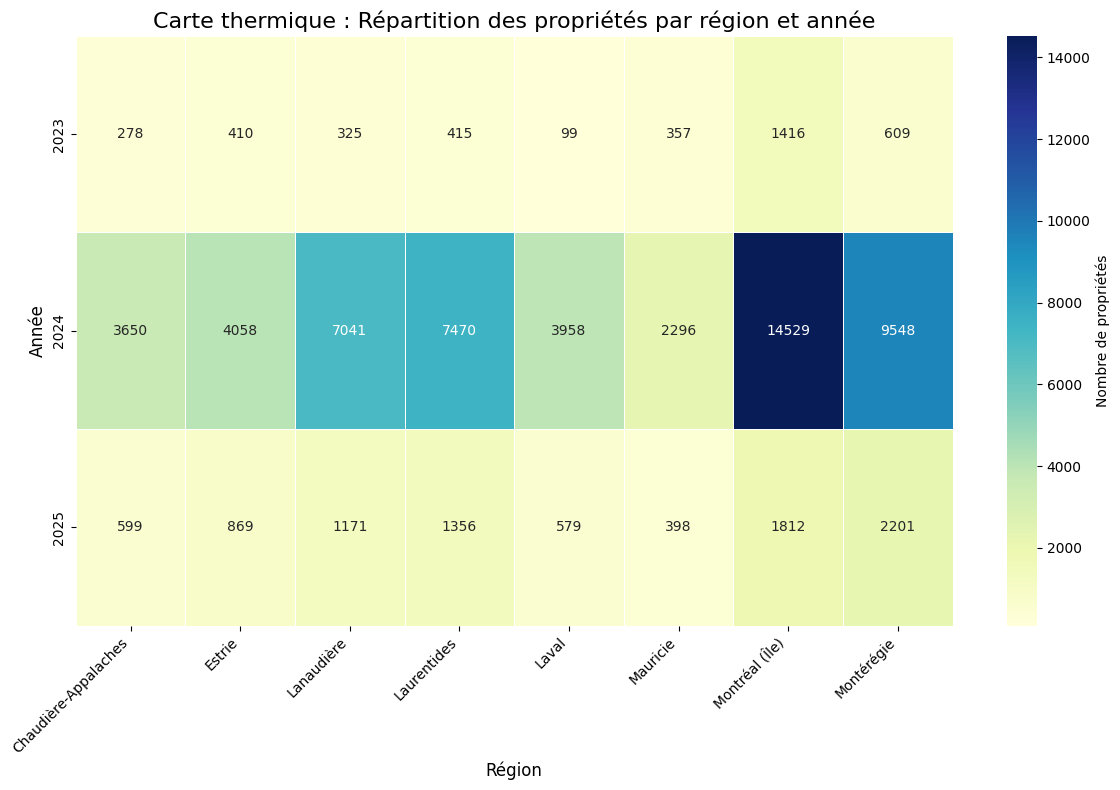

In [26]:
# Extraire l'année à partir d'une colonne de type date (par exemple, 'date_ajout')
df_properties['year_added'] = pd.to_datetime(df_properties['add_date']).dt.year

# Tableau croisé dynamique pour observer les régions par année
yearly_region_distribution = pd.crosstab(df_properties['year_added'], df_properties['region'])

# Afficher les résultats
#print(yearly_region_distribution)

# Exporter les données
yearly_region_distribution.to_csv("yearly_region_distribution.csv")
print("Répartition des propriétés par région et année exportée dans 'yearly_region_distribution.csv'.")

# Visualisation avec une Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    yearly_region_distribution, 
    annot=True, 
    fmt="d", 
    cmap="YlGnBu", 
    linewidths=0.5, 
    cbar_kws={"label": "Nombre de propriétés"}
)

# Ajouter des labels et un titre
plt.title("Carte thermique : Répartition des propriétés par région et année", fontsize=16)
plt.xlabel("Région", fontsize=12)
plt.ylabel("Année", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Afficher le graphique
plt.show()

Répartition des propriétés par région, année et catégorie exportée dans 'yearly_region_category_distribution.csv'.


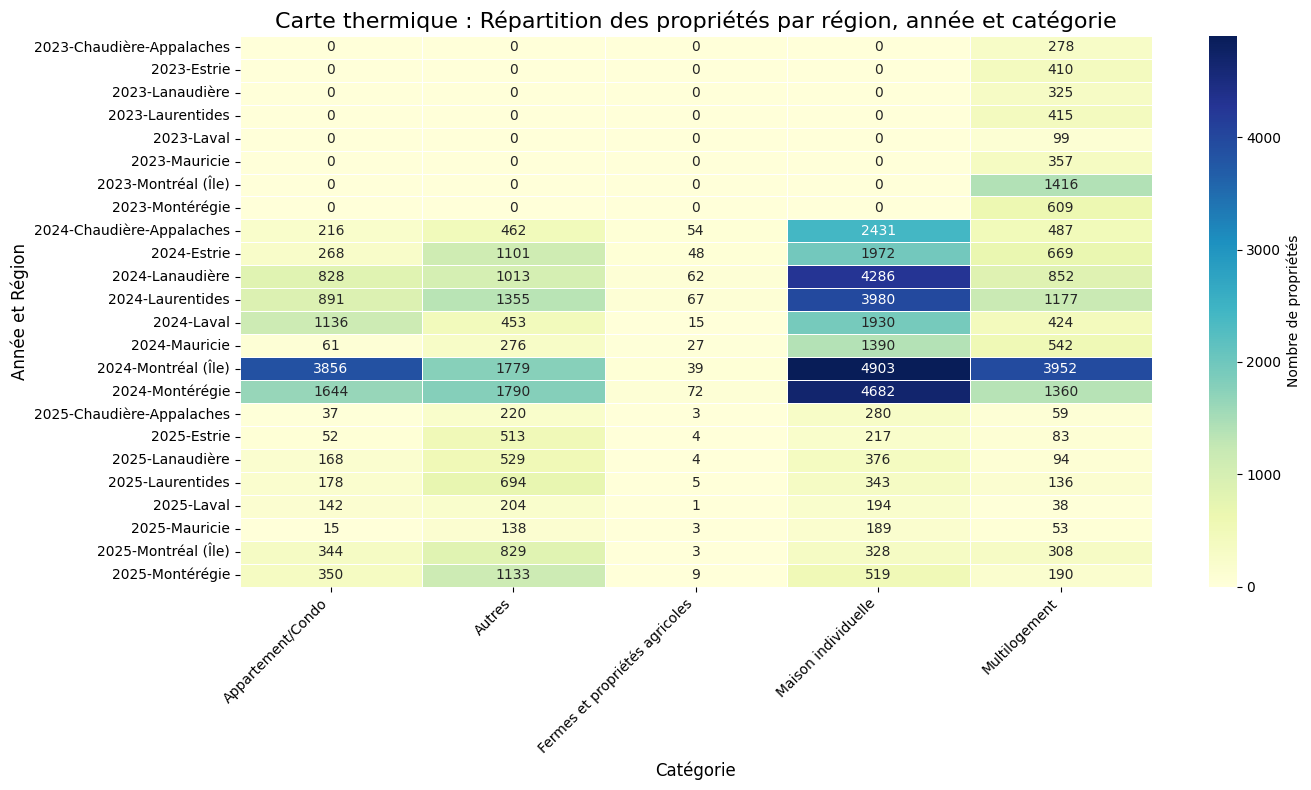

In [27]:
# Extraire l'année à partir d'une colonne de type date (par exemple, 'date_ajout')
df_properties['year_added'] = pd.to_datetime(df_properties['add_date']).dt.year

# Tableau croisé dynamique pour observer les régions, catégories et années
yearly_region_category_distribution = pd.crosstab([df_properties['year_added'], df_properties['region']], df_properties['category'])

# Afficher les résultats
#print(yearly_region_category_distribution)

# Exporter les données
yearly_region_category_distribution.to_csv("yearly_region_category_distribution.csv")
print("Répartition des propriétés par région, année et catégorie exportée dans 'yearly_region_category_distribution.csv'.")

# Visualisation avec une Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    yearly_region_category_distribution, 
    annot=True, 
    fmt="d", 
    cmap="YlGnBu", 
    linewidths=0.5, 
    cbar_kws={"label": "Nombre de propriétés"}
)

# Ajouter des labels et un titre
plt.title("Carte thermique : Répartition des propriétés par région, année et catégorie", fontsize=16)
plt.xlabel("Catégorie", fontsize=12)
plt.ylabel("Année et Région", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Afficher le graphique
plt.show()

In [28]:
# Réinitialiser l'index pour convertir le tableau croisé en DataFrame utilisable
yearly_region_category_distribution = yearly_region_category_distribution.reset_index()

# Création du graphique
plt.figure(figsize=(16, 8))

# Graphique en barres empilées groupées
categories = yearly_region_category_distribution.columns[2:]  # Colonnes des catégories
regions = yearly_region_category_distribution['region'].unique()
years = yearly_region_category_distribution['year_added'].unique()

bar_width = 0.15  # Largeur de chaque barre
x_positions = np.arange(len(years))  # Positions des années sur l'axe X

# Boucle pour chaque région et catégorie
for i, region in enumerate(regions):
    subset = yearly_region_category_distribution[yearly_region_category_distribution['region'] == region]
    bottom_value = np.zeros(len(years))
    for category in categories:
        values = subset[category].values if category in subset.columns else np.zeros(len(years))
        plt.bar(
            x_positions + i * bar_width,  # Décalage des régions
            values, 
            bar_width,
            bottom=bottom_value, 
            label=f"{region} - {category}" if i == 0 else "", 
        )
        bottom_value += values

# Ajouter des labels et un titre
plt.title("Évolution des propriétés par région, année et catégorie", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre de propriétés", fontsize=12)
plt.xticks(x_positions + bar_width * (len(regions) - 1) / 2, years, rotation=45, ha="right")
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), title="Région et Catégorie")
plt.tight_layout()

# Afficher le graphique
plt.show()

NameError: name 'np' is not defined

<Figure size 1600x800 with 0 Axes>

### Explorer les caractéristiques des propriétés dans une région spécifique

#### Uniformiser les données dans la colonne

### Exporter la distribution pour la région

                _id    longitude     latitude         price  municipal_taxes  \
count  3.886000e+03  3886.000000  3886.000000  3.886000e+03      3886.000000   
mean   1.907494e+07   -72.598429    46.660967  3.959794e+05      1093.256519   
std    5.677574e+06     1.363055     0.737017  3.546069e+05      1946.356238   
min    9.005906e+06   -79.228284    45.096336  5.000000e-01         0.000000   
25%    1.417679e+07   -72.882005    46.343357  1.999990e+05         0.000000   
50%    1.910516e+07   -72.690682    46.453648  3.000000e+05         0.000000   
75%    2.392491e+07   -72.546756    46.622312  4.600000e+05      2103.750000   
max    2.898456e+07   -67.421389    49.970904  4.900000e+06     22098.000000   

       school_taxes  construction_year       surface   nb_bedroom  \
count   3886.000000        2900.000000  3.023000e+03  1431.000000   
mean      64.401478        1967.769655  5.340778e+04     3.129280   
std      140.778336          36.373812  3.886424e+05     1.268522   
min

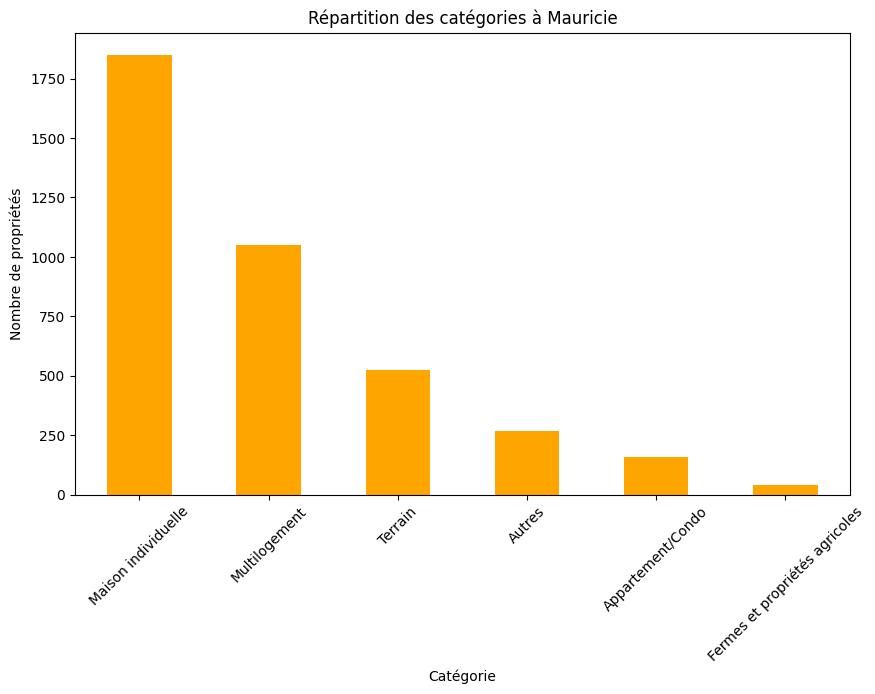

In [ ]:
# Convertir toutes les valeurs en booléen
filtered_data['vendue'] = filtered_data['vendue'].map(lambda x: str(x).lower() == 'true')

# Vérifier les valeurs uniques après la conversion
print(filtered_data['vendue'].unique())

### Analysons une catégorie spécifique dans une région particulière, voici une démarche détaillée. Prenons comme exemple la région "***Montréal (Île)***" et la catégorie "***Appartement/condo***" :

In [ ]:
# Convertir toutes les valeurs en booléen
filtered_data['vendue'] = filtered_data['vendue'].map(lambda x: str(x).lower() == 'true')

# Vérifier les valeurs uniques après la conversion
print(filtered_data['vendue'].unique())

Données exportées dans 'region_Mauricie_distribution.csv' et 'region_Mauricie_category_distribution.csv'.


### Statistiques descriptives pour cette catégorie dans la région

In [182]:
# Définir la région et la catégorie
region_name = region  # Remplacez par la région souhaitée
category_name = "Multilogement"  # Remplacez par la catégorie souhaitée

# Filtrer les données
filtered_data = df_properties[(df_properties['region'] == region_name) & (df_properties['category'] == category_name)]

# Afficher les premières lignes et le nombre total
print(filtered_data.head())
print(f"Nombre total de propriétés pour la catégorie '{category_name}' dans la région '{region_name}' : {len(filtered_data)}")

           _id    add_date         city  \
25    28509350  2024-08-11   Yamachiche   
26    13536308  2024-07-30  Louiseville   
1594  25104056  2024-08-11   Shawinigan   
1595  12270257  2024-08-11   Shawinigan   
1597  21576517  2024-07-30   Shawinigan   

                                            description  longitude   latitude  \
25    Duplex à vendre à Yamachiche, Mauricie, 350 - ... -72.799366  46.294252   
26    Duplex for sale in Louiseville, Mauricie, 381 ... -72.946971  46.258421   
1594  Quadruplex à vendre à Shawinigan, Mauricie, 62... -72.692003  46.614556   
1595  Triplex à vendre à Shawinigan, Mauricie, 21 - ... -72.684621  46.620005   
1597  Quadruplex à vendre à Shawinigan, Mauricie, 39... -72.732217  46.505803   

         price        type  municipal_taxes  school_taxes  construction_year  \
25    299900.0      Duplex           2399.0         133.0             1943.0   
26    249900.0      Duplex              0.0           0.0                NaN   
1594  425000.0

                _id    longitude     latitude         price  municipal_taxes  \
count  3.886000e+03  3886.000000  3886.000000  3.886000e+03      3886.000000   
mean   1.907494e+07   -72.598429    46.660967  3.959794e+05      1093.256519   
std    5.677574e+06     1.363055     0.737017  3.546069e+05      1946.356238   
min    9.005906e+06   -79.228284    45.096336  5.000000e-01         0.000000   
25%    1.417679e+07   -72.882005    46.343357  1.999990e+05         0.000000   
50%    1.910516e+07   -72.690682    46.453648  3.000000e+05         0.000000   
75%    2.392491e+07   -72.546756    46.622312  4.600000e+05      2103.750000   
max    2.898456e+07   -67.421389    49.970904  4.900000e+06     22098.000000   

       school_taxes  construction_year       surface   nb_bedroom  \
count   3886.000000        2900.000000  3.023000e+03  1431.000000   
mean      64.401478        1967.769655  5.340778e+04     3.129280   
std      140.778336          36.373812  3.886424e+05     1.268522   
min

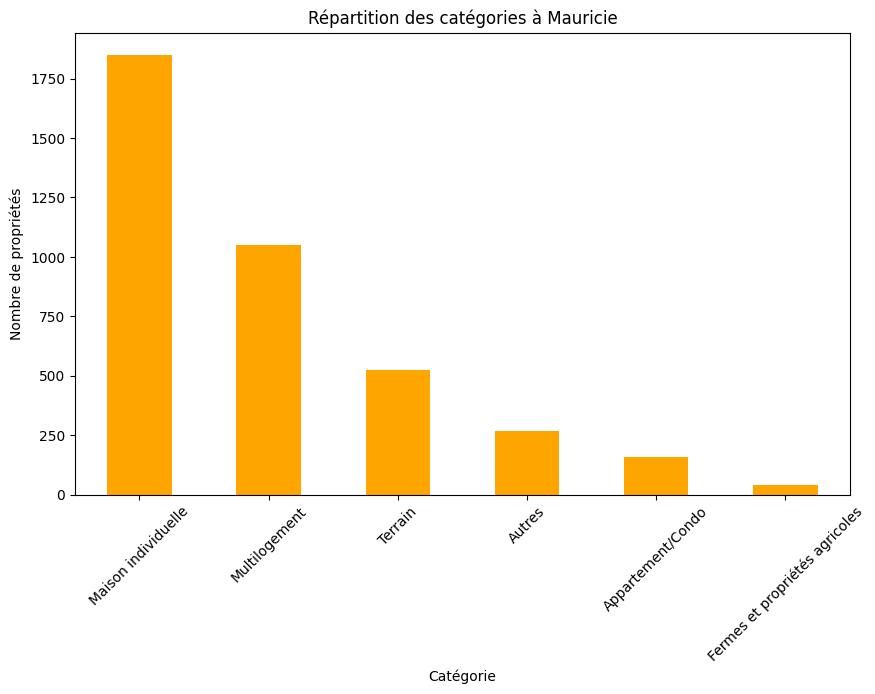

In [179]:
# Filtrer les propriétés pour une région spécifique
region= 'Mauricie'
region_specific = df_properties[df_properties['region'] == region]

# Statistiques descriptives
print(region_specific.describe())

# Répartition des types de propriétés dans cette région
type_distribution_in_region = region_specific['category'].value_counts()
print(type_distribution_in_region)

# Visualisation
type_distribution_in_region.plot(kind='bar', figsize=(10, 6), color='orange', title=f"Répartition des catégories à {region}")
plt.ylabel("Nombre de propriétés")
plt.xlabel("Catégorie")
plt.xticks(rotation=45)
plt.show()

In [183]:
# Statistiques descriptives pour les colonnes numériques
stats = filtered_data[['price', 'surface', 'municipal_taxes', 'school_taxes', 'construction_year', 'nb_bedroom', 'nb_bathroom']].describe()

# Afficher les statistiques descriptives
print(stats)

              price        surface  municipal_taxes  school_taxes  \
count  1.049000e+03     940.000000      1049.000000   1049.000000   
mean   3.294342e+05    6960.283155      1894.960196     89.684461   
std    1.857224e+05   17613.324423      2370.272880    189.247885   
min    5.000000e+04       0.000000         0.000000      0.000000   
25%    2.150000e+05    2179.000000         0.000000      0.000000   
50%    2.850000e+05    4511.000000       307.000000     20.000000   
75%    3.890000e+05    6570.250000      3386.000000    130.000000   
max    1.899000e+06  437505.000000     22098.000000   2500.000000   

       construction_year  nb_bedroom  nb_bathroom  
count         939.000000  250.000000   253.000000  
mean         1942.100106    2.332000     1.173913  
std            30.747555    0.930181     0.564660  
min          1847.000000    1.000000     1.000000  
25%          1920.000000    2.000000     1.000000  
50%          1942.000000    2.000000     1.000000  
75%          1

Répartition des propriétés par région et année exportée dans 'yearly_region_distribution.csv'.


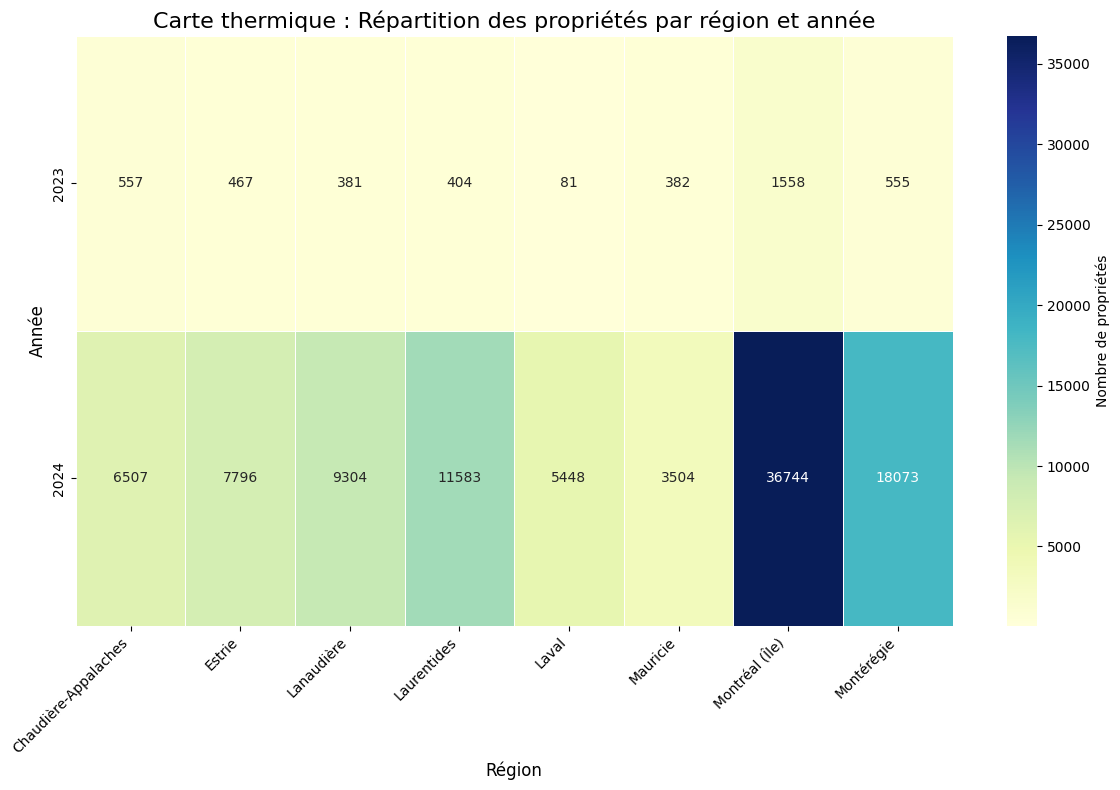

In [176]:
# Convertir toutes les valeurs en booléen
filtered_data['vendue'] = filtered_data['vendue'].map(lambda x: str(x).lower() == 'true')

# Vérifier les valeurs uniques après la conversion
print(filtered_data['vendue'].unique())

In [185]:
filtered_data['vendue'].unique()

array([ True, False])

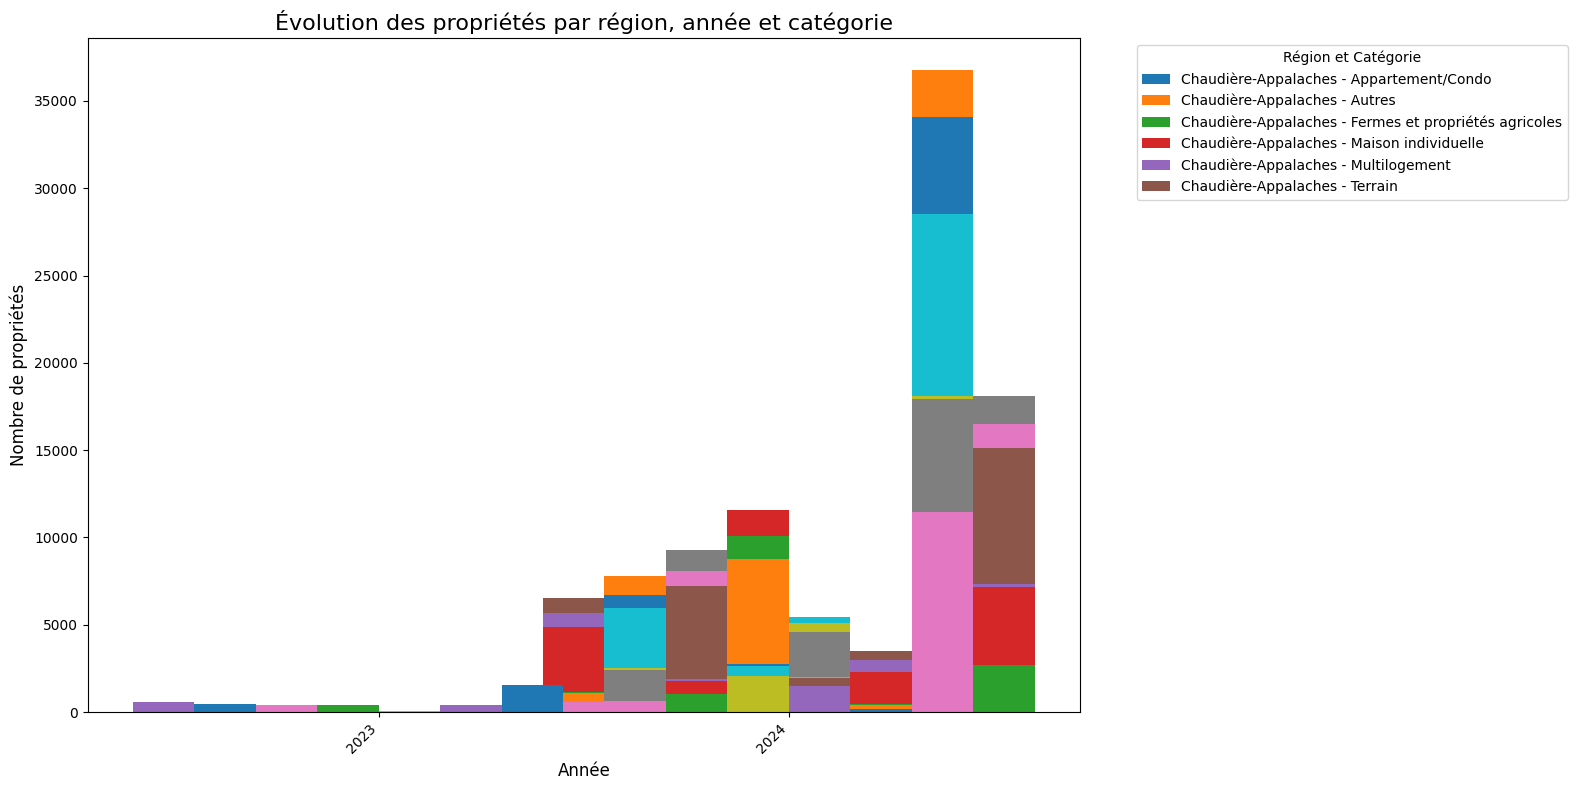

In [178]:
# Convertir toutes les valeurs en booléen
filtered_data['vendue'] = filtered_data['vendue'].map(lambda x: str(x).lower() == 'true')

# Vérifier les valeurs uniques après la conversion
print(filtered_data['vendue'].unique())

In [187]:
# Filtrer les propriétés situées à Montréal et non vendues
montreal_data = filtered_data[
    (df_properties['vendue'] == False)# Propriétés non vendues
]

# Afficher un aperçu des données filtrées
print(f"Nombre de propriétés en vente sur l'île de Montréal : {len(montreal_data)}")
print(montreal_data.head())

Nombre de propriétés en vente sur l'île de Montréal : 87
            _id    add_date         city  \
65732  12986798  2024-09-30  Louiseville   
65802  28902169  2024-09-30   Shawinigan   
66243  20522151  2024-09-30   Shawinigan   
66622  15055511  2024-09-30   Shawinigan   
66844  19633716  2024-09-30   Shawinigan   

                                             description  longitude  \
65732  Triplex à vendre à Louiseville, Mauricie, 49 -... -72.943657   
65802  Quadruplex à vendre à Shawinigan, Mauricie, 18... -72.744857   
66243  Duplex à vendre à Shawinigan, Mauricie, 430 - ... -72.699070   
66622  Quintuplex à vendre à Shawinigan, Mauricie, 30... -72.746247   
66844  Duplex à vendre à Shawinigan, Mauricie, 5833 -... -72.725143   

        latitude     price        type  municipal_taxes  school_taxes  \
65732  46.256617  329000.0     Triplex              0.0           0.0   
65802  46.561971  299500.0  Quadruplex              0.0           0.0   
66243  46.622309  179000.0      

/var/folders/xz/ddgf0yhx2878l5_5hjcr9rp00000gn/T/ipykernel_31218/226250872.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  montreal_data = filtered_data[


vendue
True     909
False    140
Name: count, dtype: int64


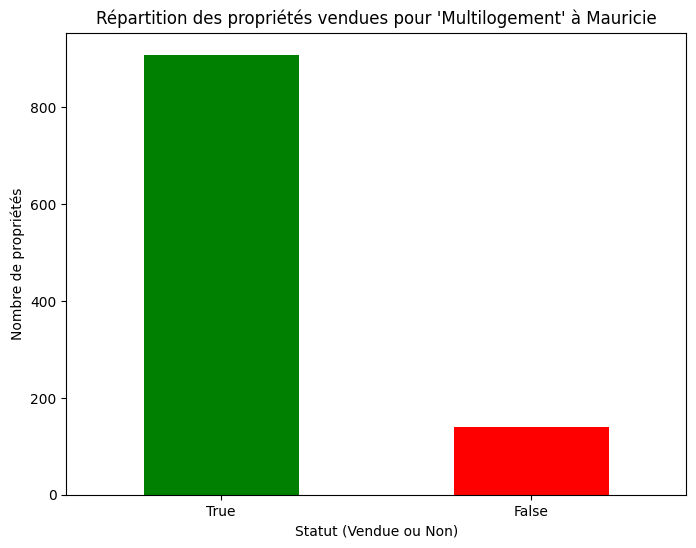

In [188]:
# Répartition des propriétés vendues ou non
vendue_counts = filtered_data['vendue'].value_counts()

# Afficher les résultats
print(vendue_counts)

# Graphique en barres
vendue_counts.plot(kind='bar', figsize=(8, 6), color=['green', 'red'], title=f"Répartition des propriétés vendues pour '{category_name}' à {region_name}")
plt.ylabel("Nombre de propriétés")
plt.xlabel("Statut (Vendue ou Non)")
plt.xticks(rotation=0)
plt.show()

In [189]:
# Filtrer les propriétés situées à Montréal et non vendues
montreal_data = filtered_data[
    (df_properties['vendue'] == False)# Propriétés non vendues
]

# Afficher un aperçu des données filtrées
print(f"Nombre de propriétés en vente sur l'île de Montréal : {len(montreal_data)}")
print(montreal_data.head())

Nombre de propriétés en vente sur l'île de Montréal : 87
            _id    add_date         city  \
65732  12986798  2024-09-30  Louiseville   
65802  28902169  2024-09-30   Shawinigan   
66243  20522151  2024-09-30   Shawinigan   
66622  15055511  2024-09-30   Shawinigan   
66844  19633716  2024-09-30   Shawinigan   

                                             description  longitude  \
65732  Triplex à vendre à Louiseville, Mauricie, 49 -... -72.943657   
65802  Quadruplex à vendre à Shawinigan, Mauricie, 18... -72.744857   
66243  Duplex à vendre à Shawinigan, Mauricie, 430 - ... -72.699070   
66622  Quintuplex à vendre à Shawinigan, Mauricie, 30... -72.746247   
66844  Duplex à vendre à Shawinigan, Mauricie, 5833 -... -72.725143   

        latitude     price        type  municipal_taxes  school_taxes  \
65732  46.256617  329000.0     Triplex              0.0           0.0   
65802  46.561971  299500.0  Quadruplex              0.0           0.0   
66243  46.622309  179000.0      

/var/folders/xz/ddgf0yhx2878l5_5hjcr9rp00000gn/T/ipykernel_31218/226250872.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  montreal_data = filtered_data[


### Variation des prix d'année en année

                _id     longitude      latitude         price  \
count  1.184400e+04  11844.000000  11844.000000  1.184400e+04   
mean   1.916335e+07    -73.168159     45.764672  6.334289e+05   
std    5.703016e+06      1.384673      0.875107  4.642111e+05   
min    9.003249e+06    -79.447056     44.995604  4.600000e+04   
25%    1.421907e+07    -73.621197     45.378452  3.950000e+05   
50%    1.919794e+07    -73.437620     45.473218  5.350000e+05   
75%    2.412586e+07    -73.233783     45.594555  7.350000e+05   
max    2.899790e+07    -62.029460     50.296045  1.150000e+07   

       municipal_taxes  school_taxes  construction_year       surface  \
count     11844.000000  11844.000000       11844.000000  1.184400e+04   
mean       2152.801121    235.054837        1982.495778  9.975779e+03   
std        1158.188596    135.269608          32.922438  1.242968e+05   
min           0.000000      0.000000        1750.000000  0.000000e+00   
25%        2093.397361    200.817517        1964.

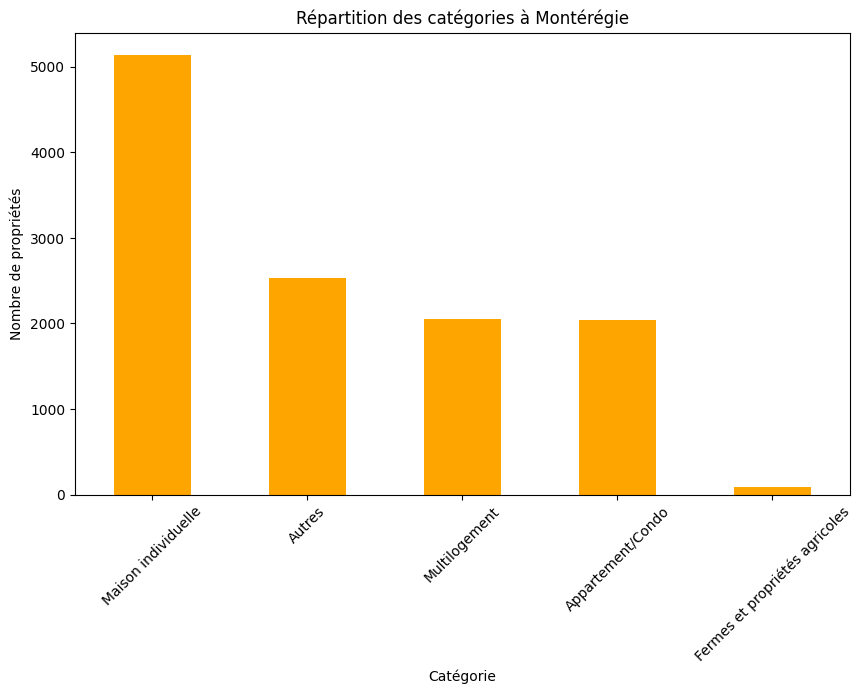

In [ ]:
# Distribution des prix
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['price'], bins=40, color='skyblue', edgecolor='black')
plt.title(f"Distribution des prix pour '{category_name}' à {region_name}")
plt.xlabel("Prix ($)")
plt.ylabel("Nombre de propriétés")
plt.show()

### Calculer le prix moyen par année

In [ ]:
# Extraire l'année et le mois de la colonne add_date
filtered_data['year'] = pd.to_datetime(filtered_data['add_date']).dt.year

filtered_data['month'] = pd.to_datetime(filtered_data['add_date']).dt.month

# Vérifier les premières lignes
print(filtered_data[['add_date', 'year','month']].head())

Données exportées dans 'region_Montérégie_distribution.csv' et 'region_Montérégie_category_distribution.csv'.


### Variation de la moyenne des prix

In [ ]:
# Grouper par année et mois, et calculer les statistiques
price_trends = filtered_data.groupby(['year','month'])['price'].agg(['mean', 'median', 'min', 'max', 'count']).reset_index()

# Afficher les premières lignes
print(price_trends.head())

   year  month           mean    median       min        max  count
0  2023      2  329587.987179  339500.0   50000.0   499900.0    234
1  2023      4  332912.631579  339000.0  118000.0   499900.0     95
2  2023      5  559004.083333  579000.0  129900.0  1250000.0    228
3  2023      6  365456.666667  392500.0  179000.0   499900.0     60
4  2023      7  401066.666667  425000.0  138000.0   499000.0     12


### Variation de la médiane des prix par année et mois

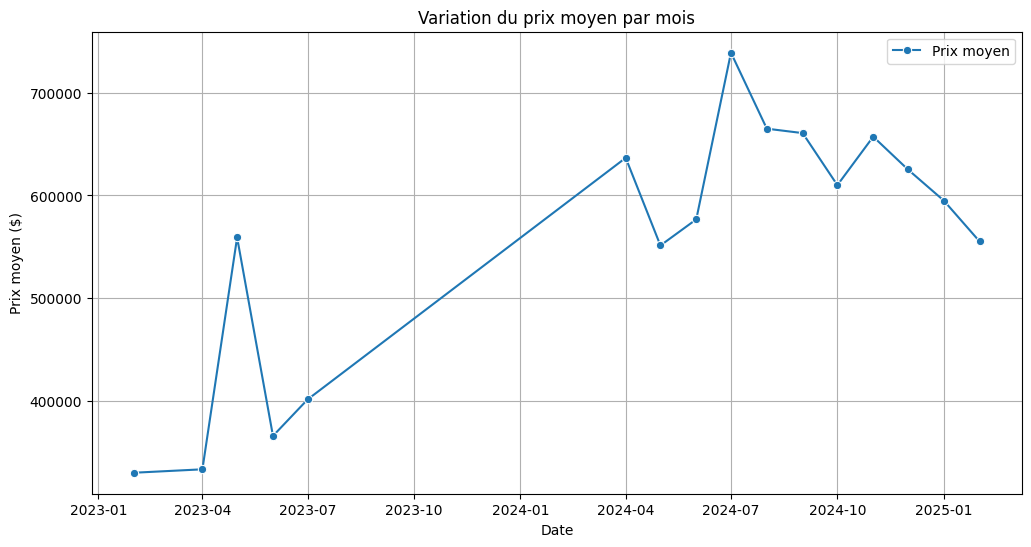

In [ ]:
import seaborn as sns

# Préparer les données pour un graphique temporel
price_trends['date'] = pd.to_datetime(price_trends[['year','month']].assign(day=1))

# Visualisation de la moyenne des prix
plt.figure(figsize=(12, 6))
sns.lineplot(data=price_trends, x='date', y='mean', marker='o', label='Prix moyen')
plt.title('Variation du prix moyen par mois')
plt.xlabel('Date')
plt.ylabel('Prix moyen ($)')
plt.grid(True)
plt.legend()
plt.show()

### Afficher des indicateurs comme la médiane, le minimum et le maximum 

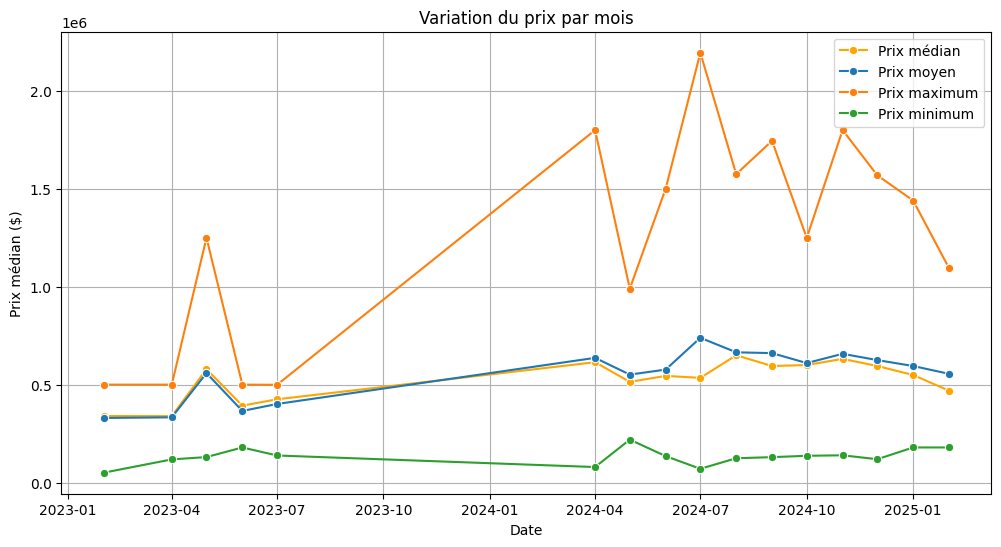

In [ ]:
# Visualisation de la médiane des prix
plt.figure(figsize=(12, 6))
sns.lineplot(data=price_trends, x='date', y='median', marker='o', color='orange', label='Prix médian')
sns.lineplot(data=price_trends, x='date', y='mean', marker='o', label='Prix moyen')
sns.lineplot(data=price_trends, x='date', y='max', marker='o', label='Prix maximum')
sns.lineplot(data=price_trends, x='date', y='min', marker='o', label='Prix minimum')
plt.title('Variation du prix par mois')
plt.xlabel('Date')
plt.ylabel('Prix médian ($)')
plt.grid(True)
plt.legend()
plt.show()